### Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime


#### Import the CSV Data as Pandas DataFrame

In [170]:
df = pd.read_csv('train.csv/train.csv')

In [171]:
df_copy = df.copy()

In [172]:
# Displaying top 5 rows in the dataframe
pd.set_option('display.max_columns', None)

In [173]:
#checking the top 5 entries in the data
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [174]:
# Shape of the dataset
print(f"number of rows in the dataframe is {df.shape[0]} \nnumber of columns in the dataframe is {df.shape[1]}")

number of rows in the dataframe is 36992 
number of columns in the dataframe is 25


In [175]:
df_copy = df.copy()

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [177]:
# Checking for missing values
df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [178]:
# getting the percentage of missing values for columns.

features_with_na  = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 2), '% missing values')

region_category 14.67 % missing values
preferred_offer_types 0.78 % missing values
points_in_wallet 9.31 % missing values


#### Dropping region_category missing rows and imputing the remaining two features which has missing values

In [179]:
df.dropna(subset=['region_category'],inplace=True)

# Impute 'points_in_wallet' with the mean
df['points_in_wallet'].fillna(df['points_in_wallet'].mean(), inplace=True)

# Impute 'preferred_offer_types' with the mode
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)

# Check for remaining missing values
print("Remaining Missing Values:\n", df[['points_in_wallet', 'preferred_offer_types', 'region_category']].isnull().sum())


Remaining Missing Values:
 points_in_wallet         0
preferred_offer_types    0
region_category          0
dtype: int64


There are only few columns with missing values. Due to the low frequency of missing values, we can drop the entries with missing values in the dataset

In [180]:
df.shape

(31564, 25)

In [181]:
# Checking for the duplicates
df.duplicated().sum()

0

In [182]:
# Check Dtypes
df.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


In [183]:
# Replace non-numeric values with NaN
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

# Convert the column to float32
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype('float32')

In [184]:
#Checking the number of unique values of each column
df.nunique()

customer_id                     31564
Name                            31564
age                                55
gender                              3
security_no                     31564
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     10310
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 26432
days_since_last_login              27
avg_time_spent                  22918
avg_transaction_value           31493
avg_frequency_login_days         1411
points_in_wallet                21098
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    6
dtype: int64

In [185]:
# Removing non-informative identifier columns (customer_id, Name, security_no, and referral_id)

df.drop(['customer_id','Name', 'security_no', 'referral_id'], axis=1, inplace=True)

In [186]:
df['churn_risk_score'].value_counts()

churn_risk_score
 3    8917
 4    8677
 5    8356
 2    2339
 1    2277
-1     998
Name: count, dtype: int64

### Exploratory Data Analysis

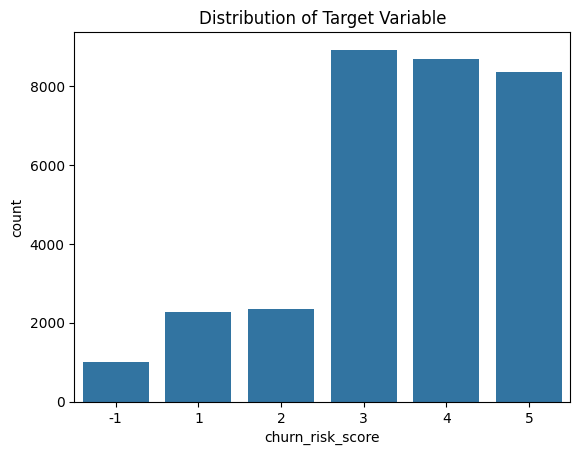

In [187]:
sns.countplot(x='churn_risk_score', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [188]:
indices_to_drop = df[df['churn_risk_score'] == -1].index
df = df.drop(indices_to_drop)

Since number of entries with '-1' are low, we can safely drop the entries of target -1.

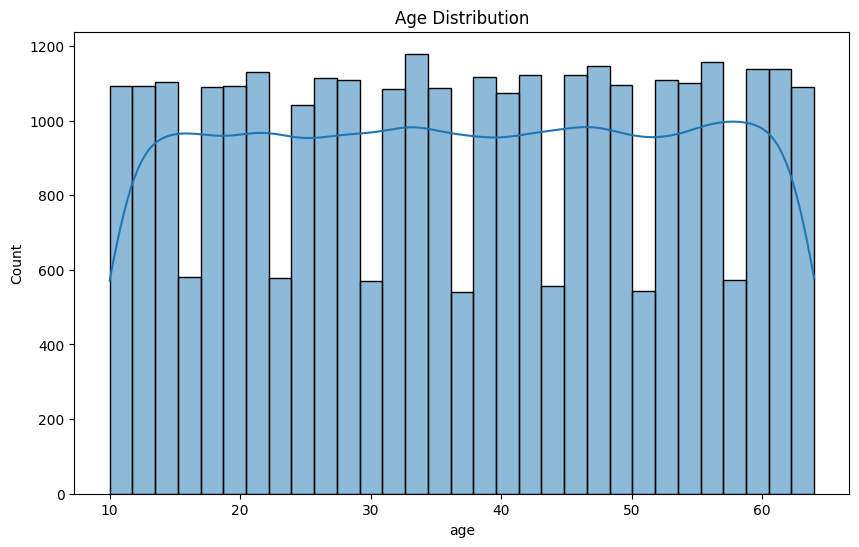

In [189]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

No inference can be drawn from the age

In [190]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [191]:
print(f"numerical_features : {numerical_features}")
print(f"categorical_features : {categorical_features}")

numerical_features : ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
categorical_features : ['gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [192]:
df[numerical_features].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,30566.000000,30566.000000,30566.000000,30566.000000,27653.000000,30566.000000,30566.000000
mean,37.106262,-42.273277,243.858234,29346.420560,15.980186,687.840381,3.605117
std,15.877546,229.484275,399.988007,19541.850452,9.230194,185.369398,1.177183
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,1.000000
25%,23.000000,8.000000,59.622500,14250.962500,9.000000,624.752500,3.000000
50%,37.000000,12.000000,161.070000,27584.540000,16.000000,687.916765,4.000000
75%,51.000000,16.000000,356.442500,40900.542500,23.000000,757.807500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061996,2069.069761,5.000000


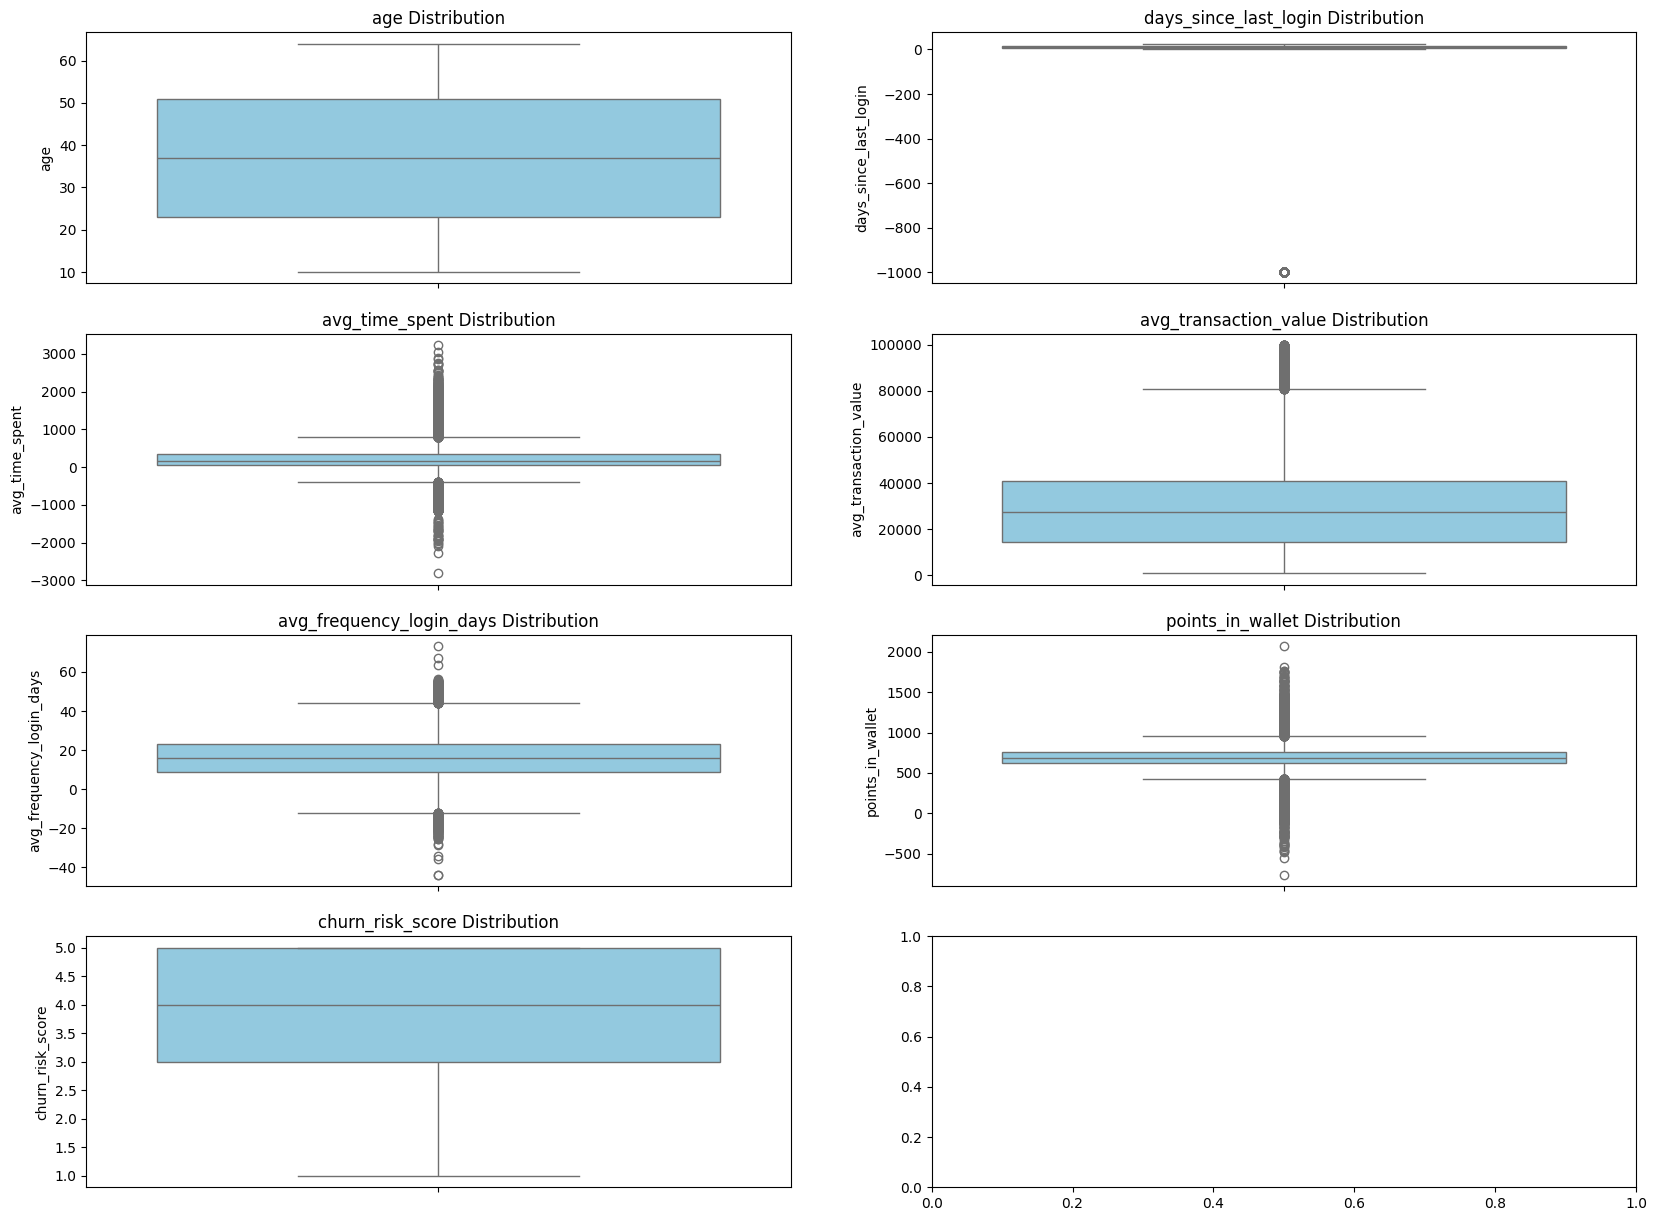

In [193]:
fig, ax = plt.subplots(4, 2, figsize=(20, 15))

for i, feature in enumerate(numerical_features):
    sns.boxplot(df[feature], ax=ax[i//2, i%2], color='skyblue')
    ax[i//2, i%2].set_title(f'{feature} Distribution')

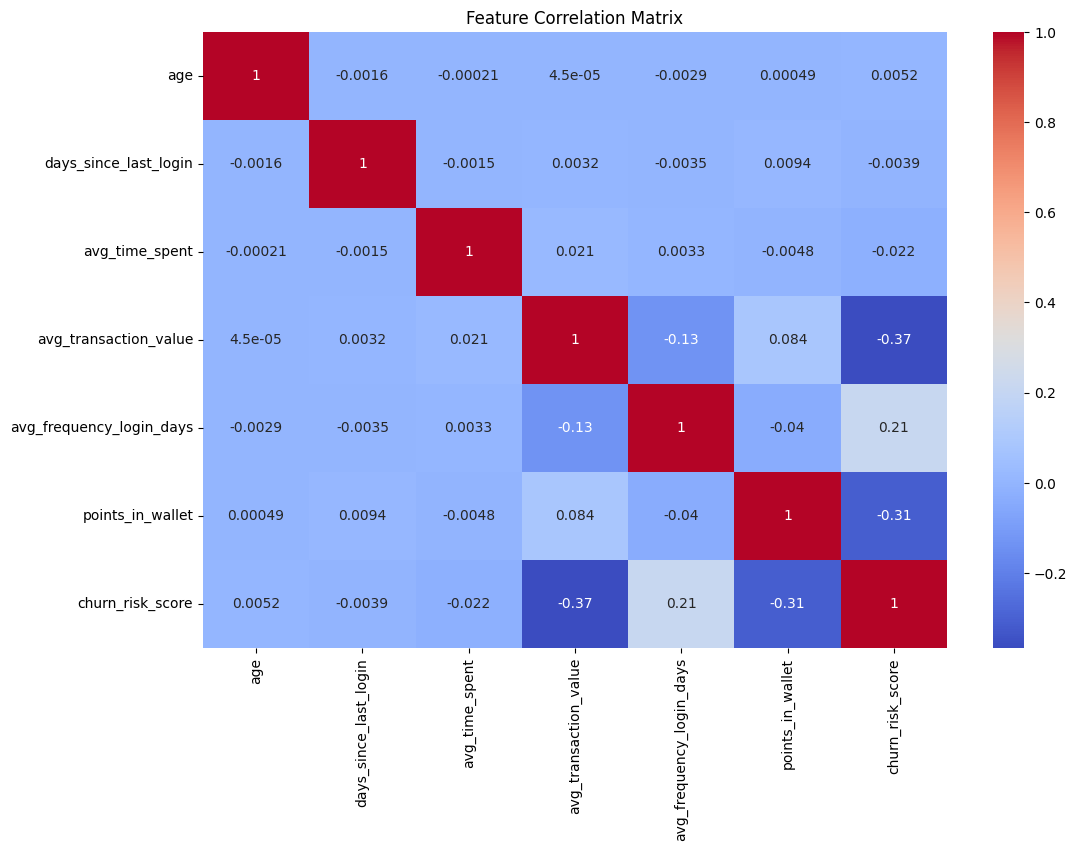

In [194]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

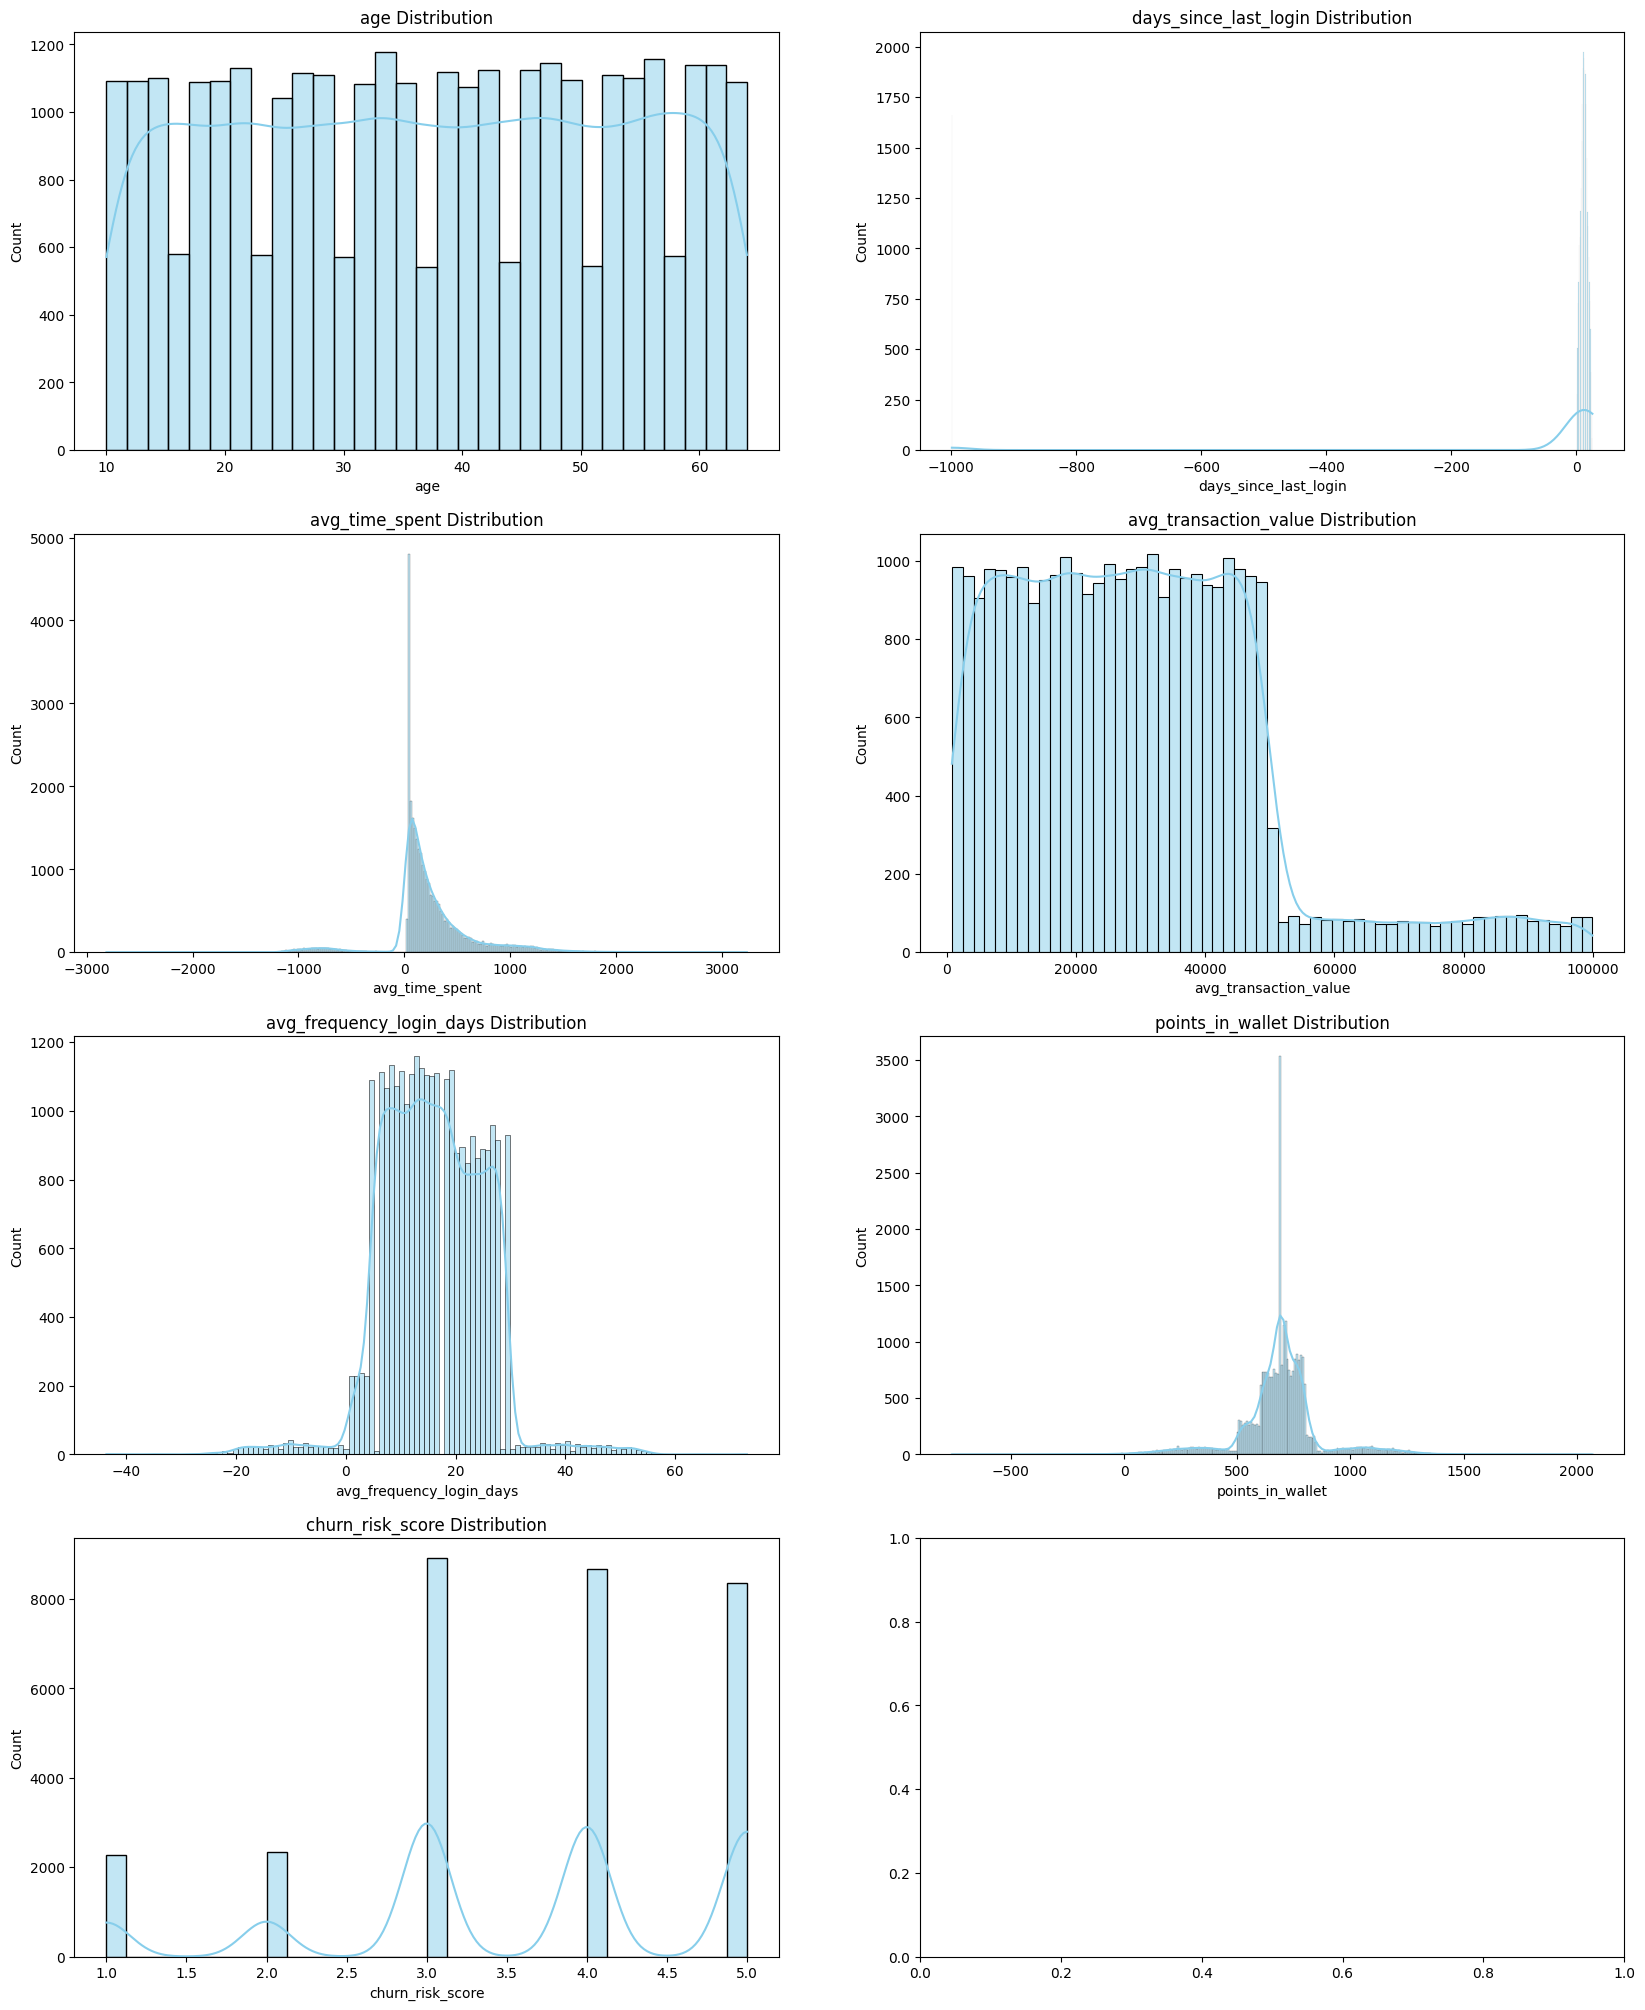

In [195]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=ax[i//2, i%2], color='skyblue')
    ax[i//2, i%2].set_title(f'{feature} Distribution')

In [ ]:
# Handle Negative Values
# Replace negative values with NaN
df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x: np.nan if x < 0 else x)

# Detect and Handle Outliers
# Method 1: Using IQR (Interquartile Range)
Q1 = df['avg_time_spent'].quantile(0.25)
Q3 = df['avg_time_spent'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['avg_time_spent'] = df['avg_time_spent'].clip(lower=lower_bound, upper=upper_bound)




In [197]:
# Applying the boxcox transformation

df['avg_time_spent'] = df['avg_time_spent'] + 1  # Ensure all values > 0
df['avg_time_spent'], _ = boxcox(df['avg_time_spent'])

In [198]:
df['avg_time_spent'].describe()

count    30566.000000
mean         6.121382
std          1.385444
min          1.079713
25%          5.020870
50%          6.153716
75%          7.186338
max          8.366164
Name: avg_time_spent, dtype: float64

<Axes: xlabel='avg_time_spent', ylabel='Count'>

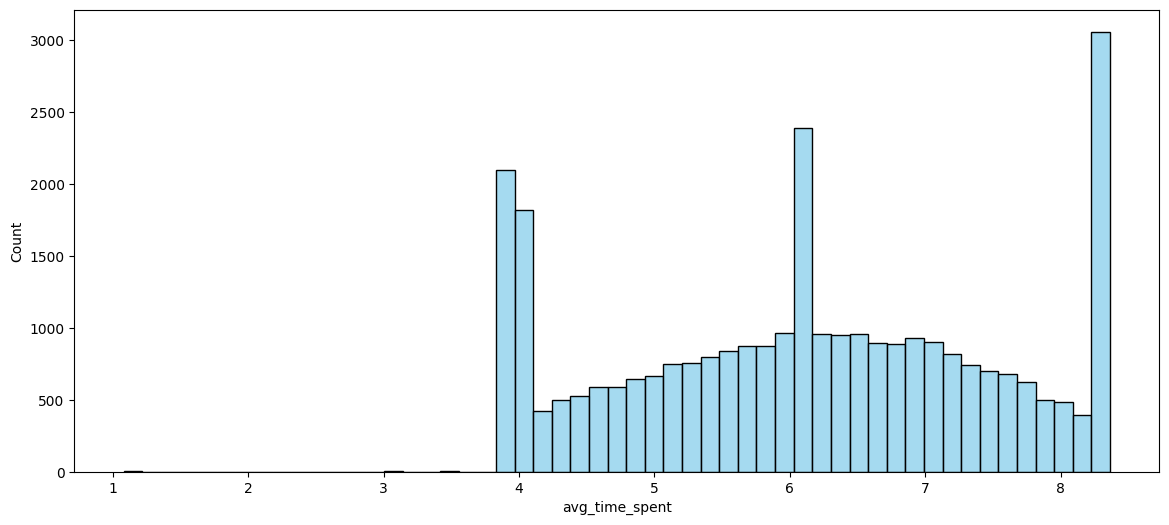

In [199]:
plt.figure(figsize=(14,6))
sns.histplot(df['avg_time_spent'], color='skyblue')

In [200]:
# Adding a small constant if required
#Ensure all values are greater than zero, if not We need to make sure they are positive by adding a constant before applying transformation.

# df['avg_transaction_value'], _ = boxcox(df['avg_transaction_value'])

In [201]:
# After transformation
# plt.figure(figsize=(14,6))
# sns.histplot(df['avg_transaction_value'], color='skyblue')

In [202]:
mean_churn = df.groupby('days_since_last_login')['churn_risk_score'].mean().reset_index()
mean_churn

,days_since_last_login,churn_risk_score
0,-999,3.627557
1,1,3.525362
2,2,3.500990
3,3,3.556319
4,4,3.472924
5,5,3.518227
6,6,3.494787
7,7,3.578903
8,8,3.605081
9,9,3.589157


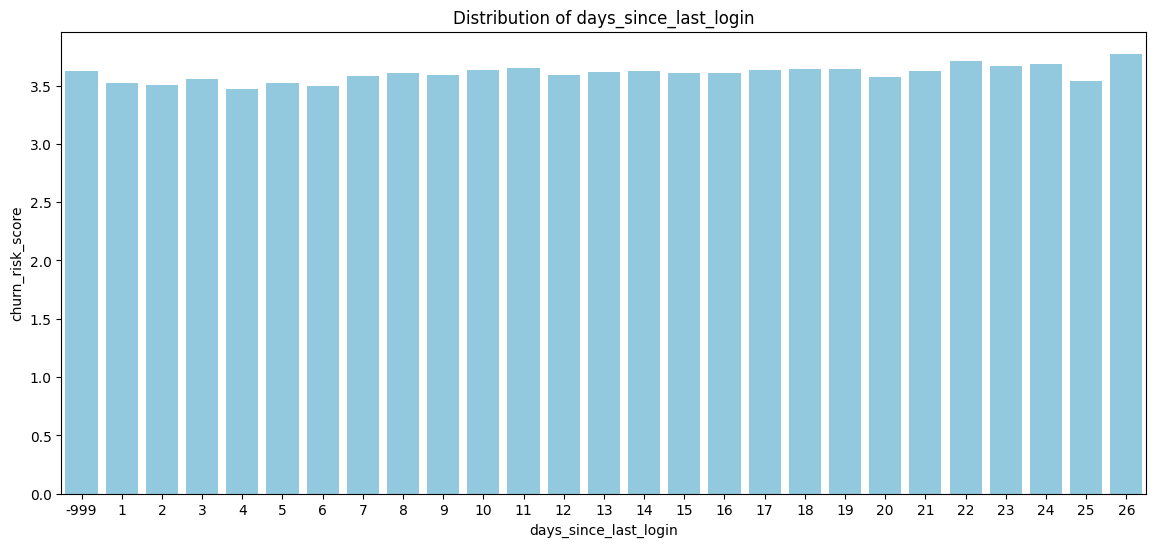

In [203]:
plt.figure(figsize=(14,6))
sns.barplot(mean_churn, x='days_since_last_login',y='churn_risk_score', color='skyblue')
plt.title('Distribution of days_since_last_login')
plt.show()

We will replace -999 with the median value because the mean of -999, is close to the other values in the distribution, indicating that -999 is likely an outlier and the median provides a more robust central tendency for imputation.

In [204]:
median = df['days_since_last_login'].median()
df['days_since_last_login'].replace(-999, median, inplace=True)

In [205]:
data = df.copy()

In [206]:
Q1 = df['points_in_wallet'].quantile(0.25)
Q3 = df['points_in_wallet'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['points_in_wallet'] = df['points_in_wallet'].clip(lower=lower_bound, upper=upper_bound)

In [207]:
Q1 = df['avg_frequency_login_days'].quantile(0.25)
Q3 = df['avg_frequency_login_days'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].clip(lower=lower_bound, upper=upper_bound)

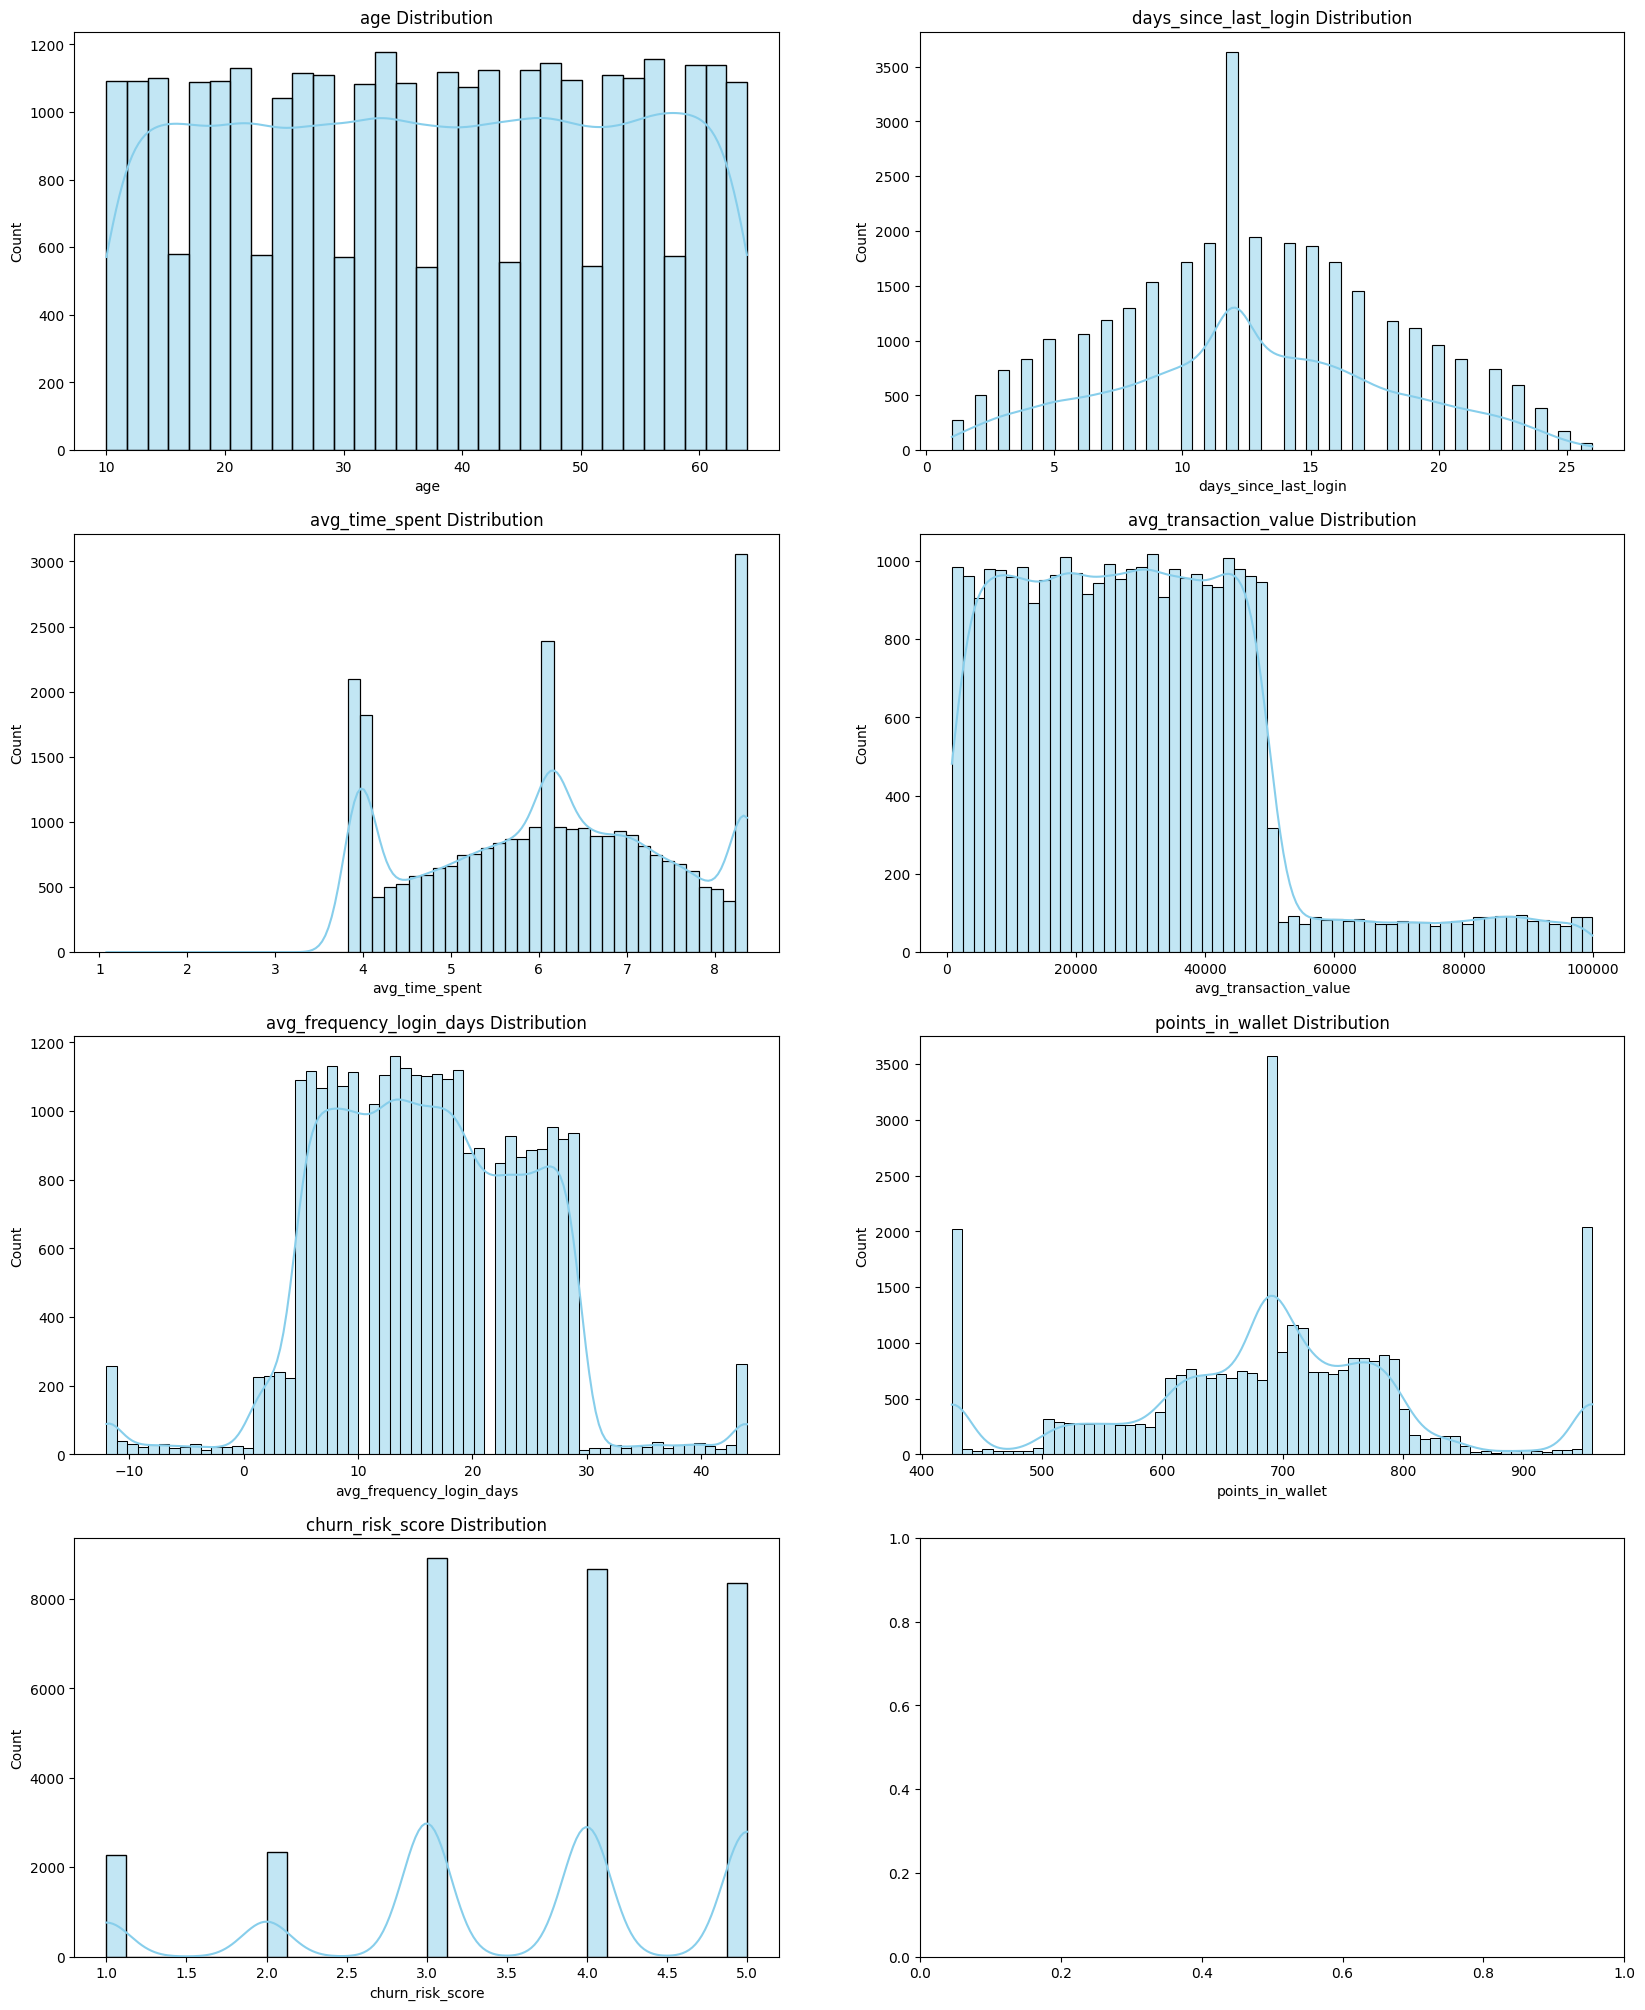

In [208]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=ax[i//2, i%2], color='skyblue')
    ax[i//2, i%2].set_title(f'{feature} Distribution')

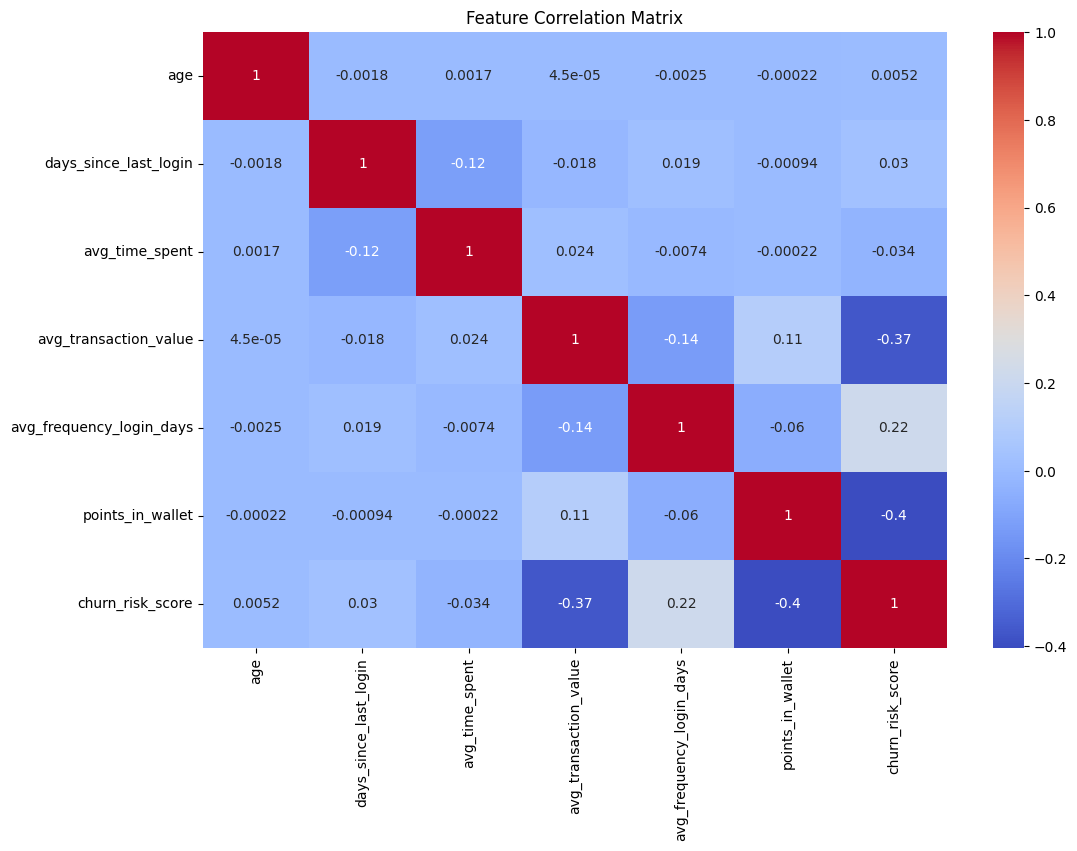

In [209]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [210]:
for col in categorical_features:
    print(f"{col} Value Counts:\n{df[col].value_counts()}\n")

gender Value Counts:
gender
F          15263
M          15254
Unknown       49
Name: count, dtype: int64

region_category Value Counts:
region_category
Town       13702
City       12315
Village     4549
Name: count, dtype: int64

membership_category Value Counts:
membership_category
Basic Membership       6353
No Membership          6347
Gold Membership        5595
Silver Membership      4993
Premium Membership     3676
Platinum Membership    3602
Name: count, dtype: int64

joining_date Value Counts:
joining_date
2015-06-02    49
2016-09-01    43
2015-07-04    42
2017-12-12    42
2016-10-13    41
              ..
2016-01-02    15
2015-06-07    14
2016-06-03    14
2016-06-22    12
2015-03-04    11
Name: count, Length: 1096, dtype: int64

joined_through_referral Value Counts:
joined_through_referral
No     13140
Yes    12918
?       4508
Name: count, dtype: int64

preferred_offer_types Value Counts:
preferred_offer_types
Gift Vouchers/Coupons       10450
Credit/Debit Card Offers    10122

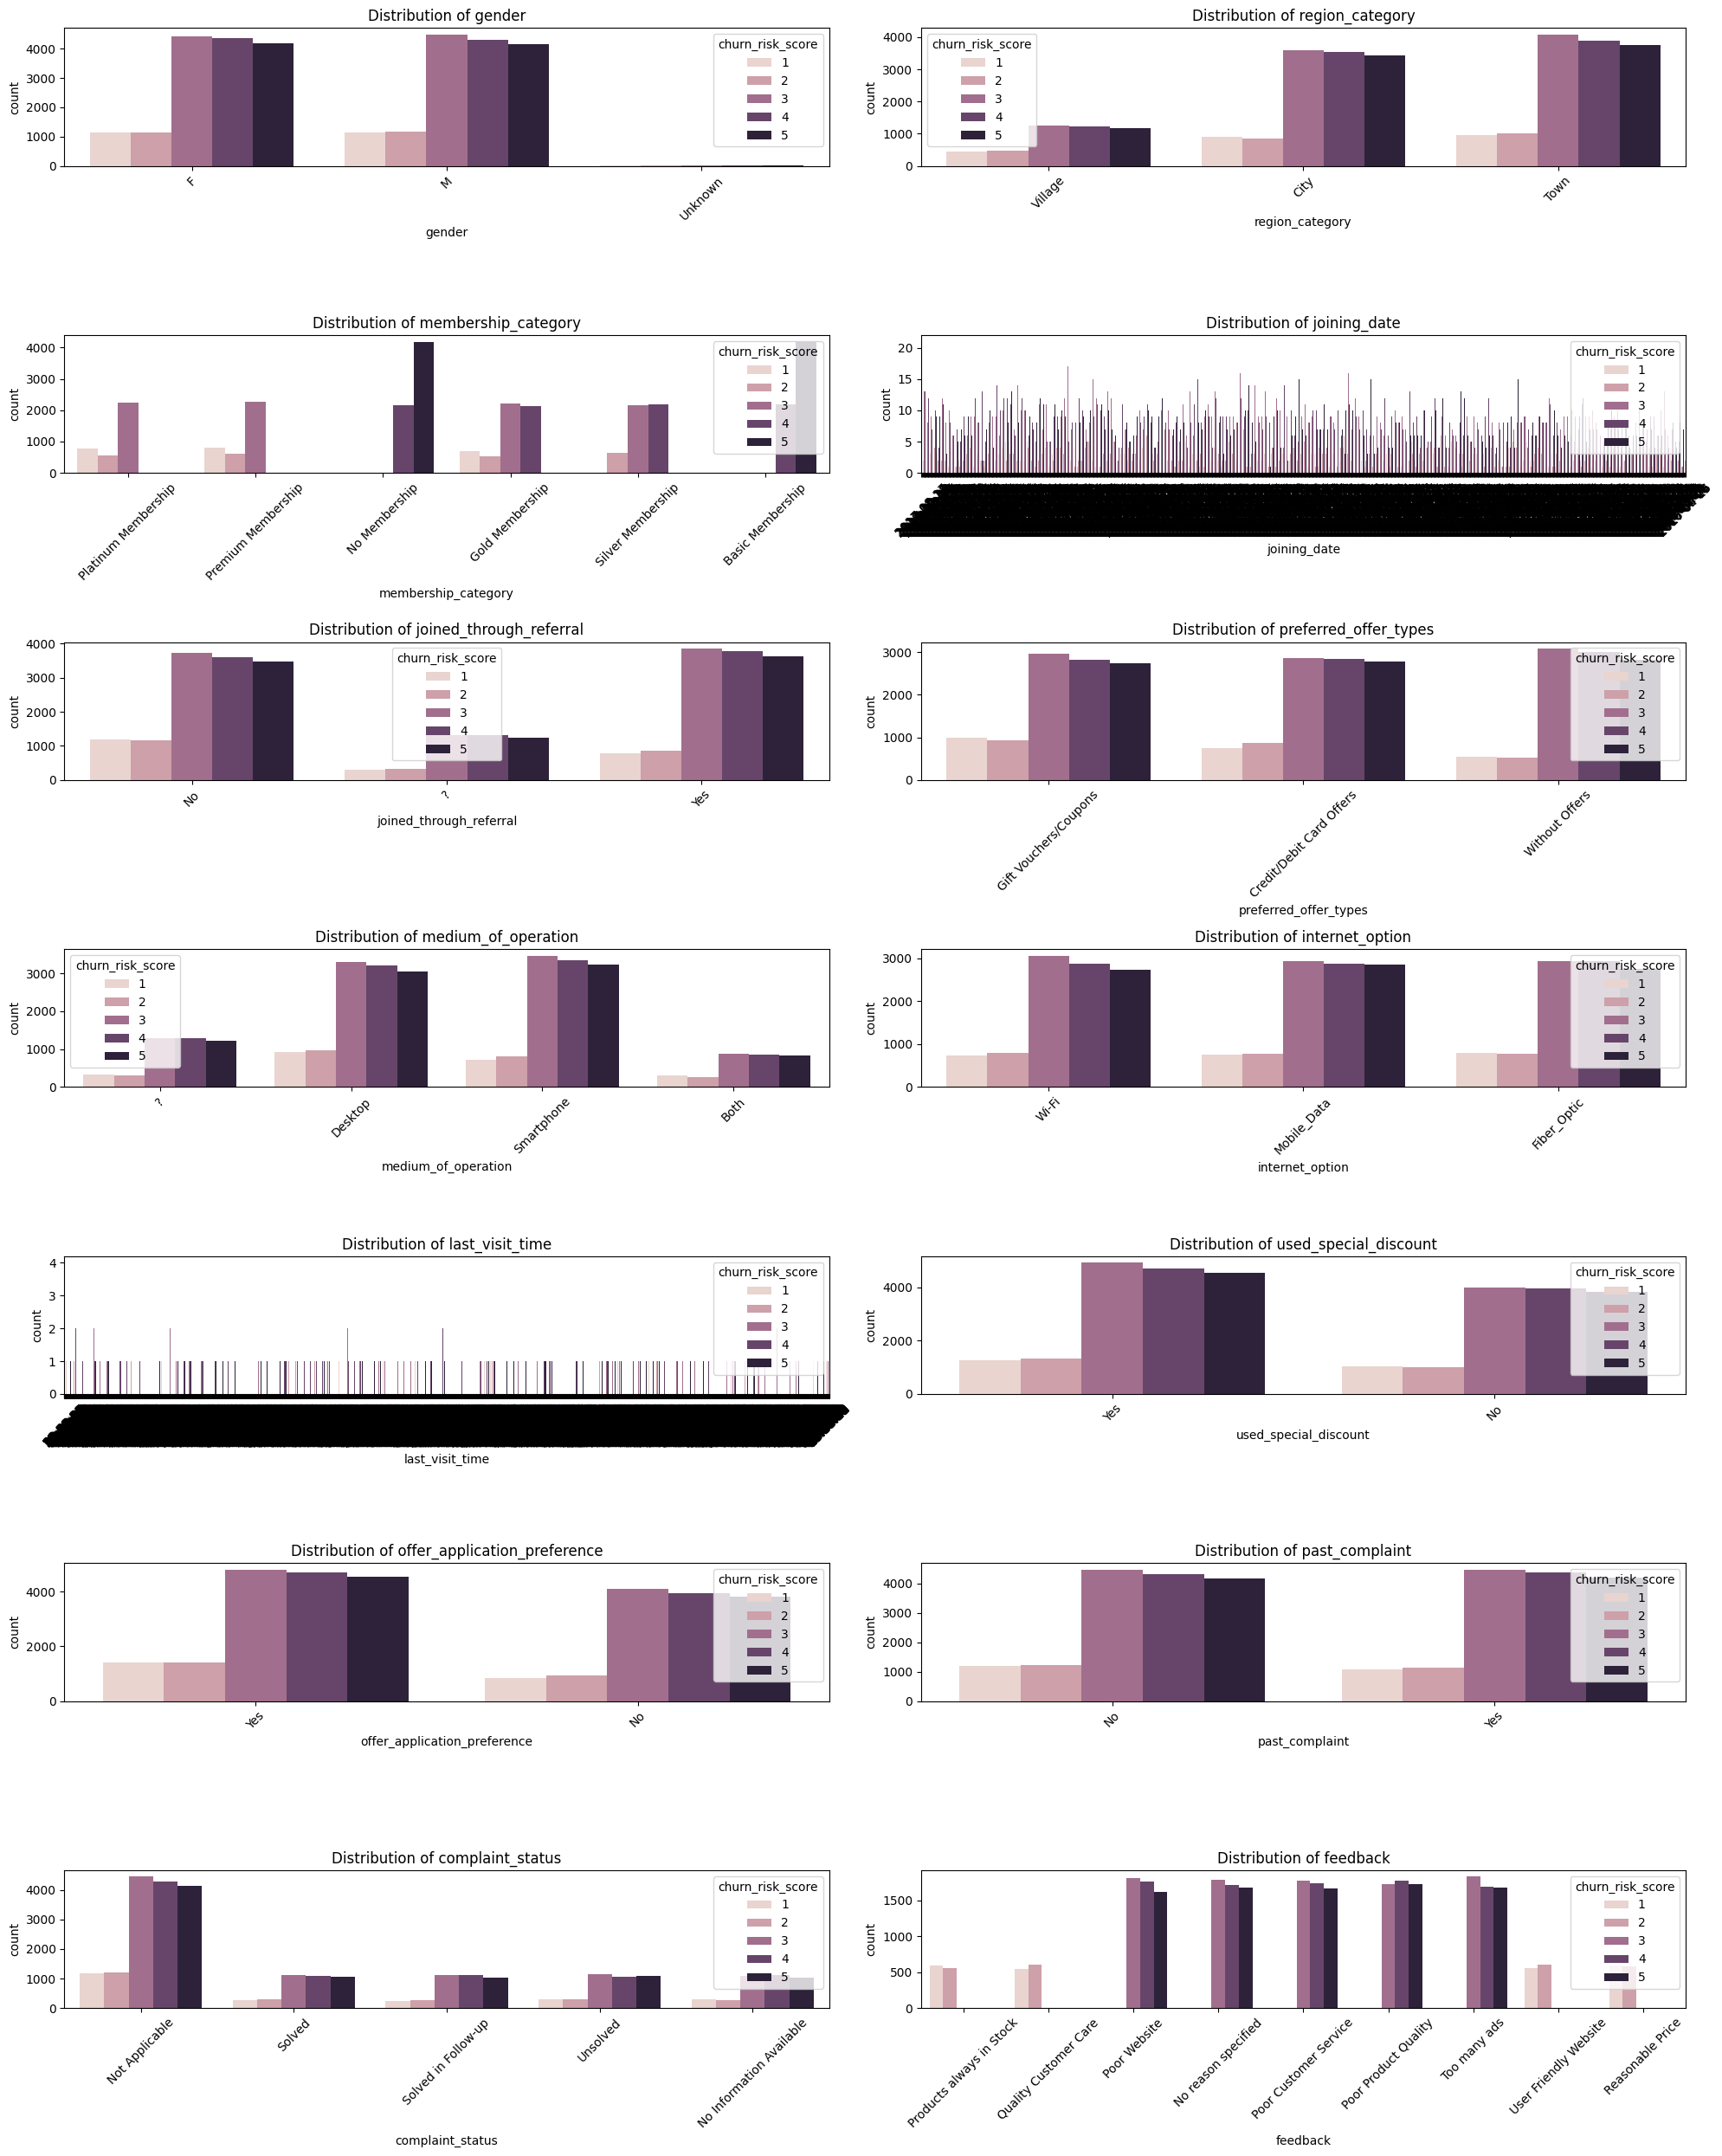

In [211]:
fig, ax = plt.subplots(7,2, figsize=(20, 25))

axes = ax.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, hue='churn_risk_score', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

Observations:
* Different regions (Village, City, Town) show varying distributions of churn risk, suggesting location might influence churn risk.

* Premium memberships and No memberships have distinct churn risk profiles.Membership type could play a significant role in determining churn risk.

* A noticeable pattern is visible in how offer application preference affect churn risk score.

* Positive feedback categories likely have lower churn risks, while negative feedback (e.g., "Product Dissatisfaction") shows higher churn risks.

In [212]:
dff = df.copy()

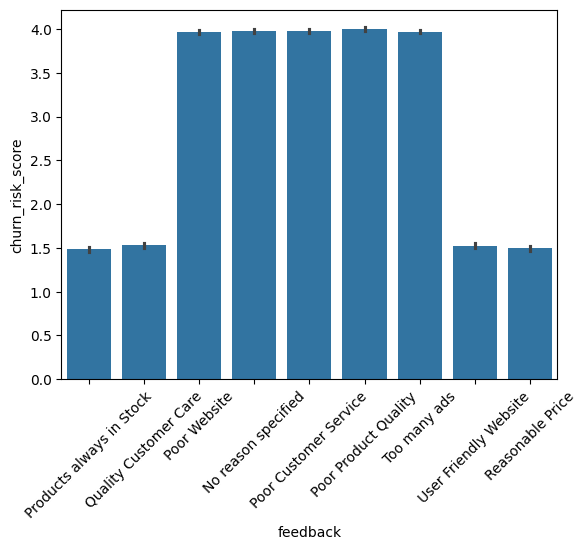

In [213]:
sns.barplot(data=dff, x='feedback', y='churn_risk_score', estimator='mean')
plt.tick_params(axis='x', rotation = 45)

In [214]:
categorical_features

['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [215]:
df['feedback'].value_counts()

feedback
Poor Product Quality        5222
Too many ads                5191
Poor Website                5189
Poor Customer Service       5177
No reason specified         5171
User Friendly Website       1164
Reasonable Price            1161
Products always in Stock    1148
Quality Customer Care       1143
Name: count, dtype: int64

In [216]:
feedback_encodings = {"Quality Customer Care": 0, "Products always in Stock": 0, 
                        "User Friendly Website": 0, "Reasonable Price": 0, 
                        "Poor Product Quality": 1, "No Membership": 1,
                        "Poor Website":1, "No reason specified": 1,
                        "Too many ads": 1}

In [217]:
df['feedback'] = df['feedback'].map(feedback_encodings)

In [218]:
membership_encodings = {"Platinum Membership": 0, "Premium Membership": 0, 
                        "Gold Membership": 1, "Silver Membership": 1, 
                        "Basic Membership": 2, "No Membership": 2}

In [219]:
df['membership_category'] = df['membership_category'].map(membership_encodings)

In [220]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,0,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,6.937238,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,0.0,2
1,32,F,City,0,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,6.964616,12838.38,10.0,687.916765,Yes,No,Yes,Solved,0.0,1
2,44,F,Town,2,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,7.738074,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,1.0,5
3,37,M,City,2,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,4.571460,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,1.0,5
4,31,F,City,2,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,5.563893,24483.66,16.0,663.060000,No,Yes,Yes,Solved,1.0,5


In [221]:
df['joining_date'].isnull().sum()

0

In [222]:
#Convert 'last_visit_time' to datetime
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time

# Define function to categorize time
def categorize_time(time):
    hour = time.hour
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply categorization
df['last_visit_time_category'] = df['last_visit_time'].apply(categorize_time)

In [223]:


# Ensure 'joining_date' is in datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')

# Check for invalid dates (NaT in pandas indicates a missing or invalid date)
invalid_dates = df['joining_date'].isnull().sum()
print(f"Number of invalid dates: {invalid_dates}")

# Check for future dates
current_date = datetime.now()
future_dates = df[df['joining_date'] > current_date].shape[0]
print(f"Number of future dates: {future_dates}")

# Sort the dates
sorted_dates = df['joining_date'].sort_values()

# Get the first and last date
first_date = sorted_dates.iloc[0]
last_date = sorted_dates.iloc[-1]

print(f"First date: {first_date}")
print(f"Last date: {last_date}")

print(f"Data type: {df['joining_date'].dtype}")

Number of invalid dates: 0
Number of future dates: 0
First date: 2015-01-01 00:00:00
Last date: 2017-12-31 00:00:00
Data type: datetime64[ns]


In [224]:
# Calculate Duration
current_date = pd.to_datetime('2024-07-29')  # or use the current date
df['days_since_joined'] = (current_date - df['joining_date']).dt.days

In [225]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,last_visit_time_category,days_since_joined
0,18,F,Village,0,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,6.937238,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,0.0,2,Afternoon,2538
1,32,F,City,0,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,6.964616,12838.38,10.0,687.916765,Yes,No,Yes,Solved,0.0,1,Afternoon,2527
2,44,F,Town,2,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,7.738074,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,1.0,5,Evening,2817
3,37,M,City,2,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,4.571460,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,1.0,5,Afternoon,2830
4,31,F,City,2,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,5.563893,24483.66,16.0,663.060000,No,Yes,Yes,Solved,1.0,5,Afternoon,2512


<Axes: xlabel='days_since_joined', ylabel='Count'>

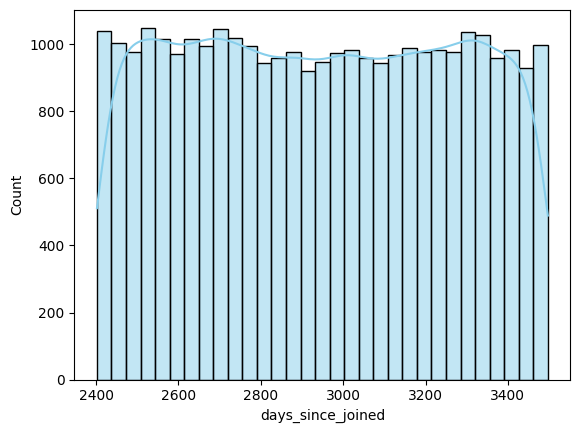

In [226]:
sns.histplot(df['days_since_joined'], kde=True, color= 'skyblue')

In [227]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

### Plotting CountPlots for the categorical features which are likely tho affect churn risk score.

In [228]:
# plt.figure(figsize=(14,6))
# sns.countplot(df, x='churn_risk_score', hue='offer_application_preference', palette='Set2')
# plt.title('offer_application_preference')

In [229]:
# plt.figure(figsize=(14,6))
# sns.countplot(df, x='churn_risk_score', hue='membership_category', palette='Set2')
# plt.title('membership_category distribution')

In [230]:
# plt.figure(figsize=(14,6))
# sns.countplot(df, x='churn_risk_score', hue='feedback', palette='Set2')
# plt.title('feedback distribution')

In [231]:
# List of columns to drop
columns_to_drop = ['joining_date', 'last_visit_time']

# Drop columns
df = df.drop(columns=columns_to_drop)

In [232]:
categorical_features = [
    'gender', 'region_category', 'joined_through_referral',
    'preferred_offer_types', 'medium_of_operation', 'internet_option',
    'used_special_discount', 'offer_application_preference', 'past_complaint',
    'complaint_status', 'last_visit_time_category'
]

In [233]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_features)

In [234]:
df.head()

,age,membership_category,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback,churn_risk_score,days_since_joined,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,last_visit_time_category_Afternoon,last_visit_time_category_Evening,last_visit_time_category_Morning,last_visit_time_category_Night
0,18,0,17,6.937238,53005.25,17.0,781.750000,0.0,2,2538,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,True,False,True,False,True,True,False,False,True,False,False,False,True,False,False,False
1,32,0,16,6.964616,12838.38,10.0,687.916765,0.0,1,2527,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False
2,44,2,14,7.738074,21027.00,22.0,500.690000,1.0,5,2817,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False
3,37,2,11,4.571460,25239.56,6.0,567.660000,1.0,5,2830,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False
4,31,2,20,5.563893,24483.66,16.0,663.060000,1.0,5,2512,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False


In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preprocessing
features = df.drop(columns=['churn_risk_score']).columns

# Define features and target
X = df[features]
y = df['churn_risk_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the class weights, 'balanced' will automatically adjust weights inversely proportional to class frequencies
class_weights = 'balanced'

# Train a Random Forest Classifier with class weights
rf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight=class_weights)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7680732744520772
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.67      0.68       470
           2       0.69      0.72      0.70       479
           3       0.88      0.91      0.90      1803
           4       0.73      0.53      0.61      1691
           5       0.72      0.90      0.80      1671

    accuracy                           0.77      6114
   macro avg       0.74      0.74      0.74      6114
weighted avg       0.77      0.77      0.76      6114

Confusion Matrix:
[[ 313  157    0    0    0]
 [ 134  345    0    0    0]
 [   0    0 1641  162    0]
 [   0    0  215  900  576]
 [   0    0    0  174 1497]]
